In [1]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister, ClassicalRegister
from qiskit.quantum_info import Statevector

from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

import numpy as np

In [2]:
import five_qubit_ecc

In [3]:
rng = np.random.default_rng()

In [4]:
rng.random(3)

array([0.57827014, 0.11134388, 0.34468432])

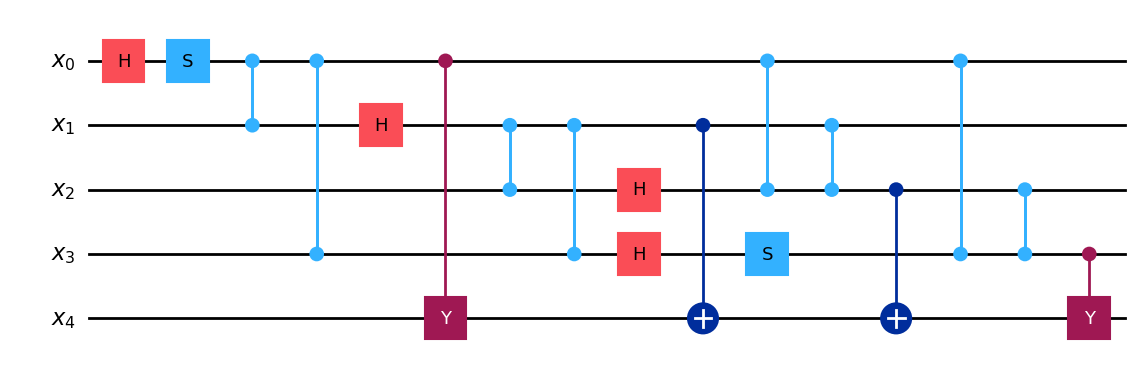

In [5]:
five_qubit_ecc.prepare_state(False).draw("mpl")

In [6]:
logical_zero = Statevector(five_qubit_ecc.prepare_state(False))

In [7]:
print(np.where(logical_zero)[0])

[ 0  3  5  6  9 10 12 15 17 18 20 23 24 27 29 30]


In [8]:
print(logical_zero)

Statevector([ 0.25+0.j,  0.  +0.j,  0.  +0.j, -0.25+0.j,  0.  +0.j,
              0.25+0.j, -0.25+0.j,  0.  +0.j,  0.  +0.j,  0.25+0.j,
              0.25+0.j,  0.  +0.j, -0.25+0.j,  0.  +0.j,  0.  +0.j,
             -0.25+0.j,  0.  +0.j, -0.25+0.j,  0.25+0.j,  0.  +0.j,
              0.25+0.j,  0.  +0.j,  0.  +0.j, -0.25+0.j, -0.25+0.j,
              0.  +0.j,  0.  +0.j, -0.25+0.j,  0.  +0.j, -0.25+0.j,
             -0.25+0.j,  0.  +0.j],
            dims=(2, 2, 2, 2, 2))


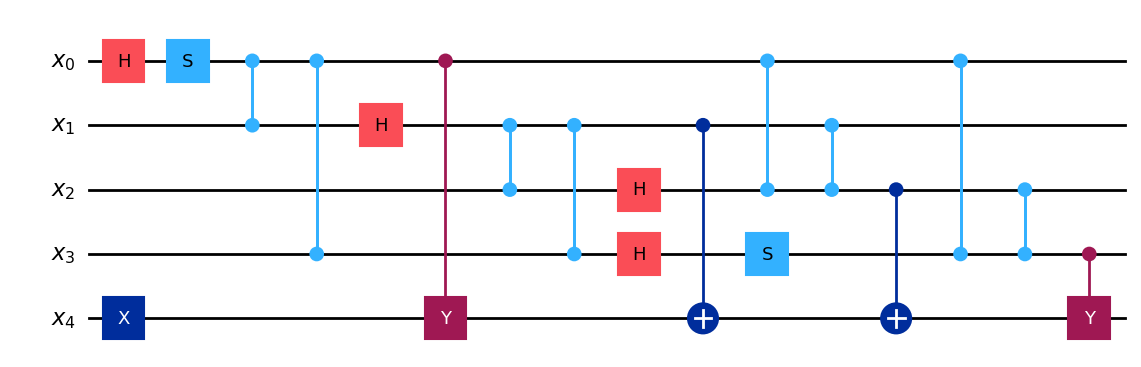

In [9]:
five_qubit_ecc.prepare_state(True).draw("mpl")

In [10]:
logical_one = Statevector(five_qubit_ecc.prepare_state(True))

In [11]:
print(np.where(logical_one)[0])

[ 1  2  4  7  8 11 13 14 16 19 21 22 25 26 28 31]


In [12]:
print(logical_one)

Statevector([ 0.  +0.j,  0.25+0.j,  0.25+0.j,  0.  +0.j,  0.25+0.j,
              0.  +0.j,  0.  +0.j,  0.25+0.j,  0.25+0.j,  0.  +0.j,
              0.  +0.j, -0.25+0.j,  0.  +0.j, -0.25+0.j,  0.25+0.j,
              0.  +0.j,  0.25+0.j,  0.  +0.j,  0.  +0.j,  0.25+0.j,
              0.  +0.j, -0.25+0.j, -0.25+0.j,  0.  +0.j,  0.  +0.j,
              0.25+0.j, -0.25+0.j,  0.  +0.j,  0.25+0.j,  0.  +0.j,
              0.  +0.j, -0.25+0.j],
            dims=(2, 2, 2, 2, 2))


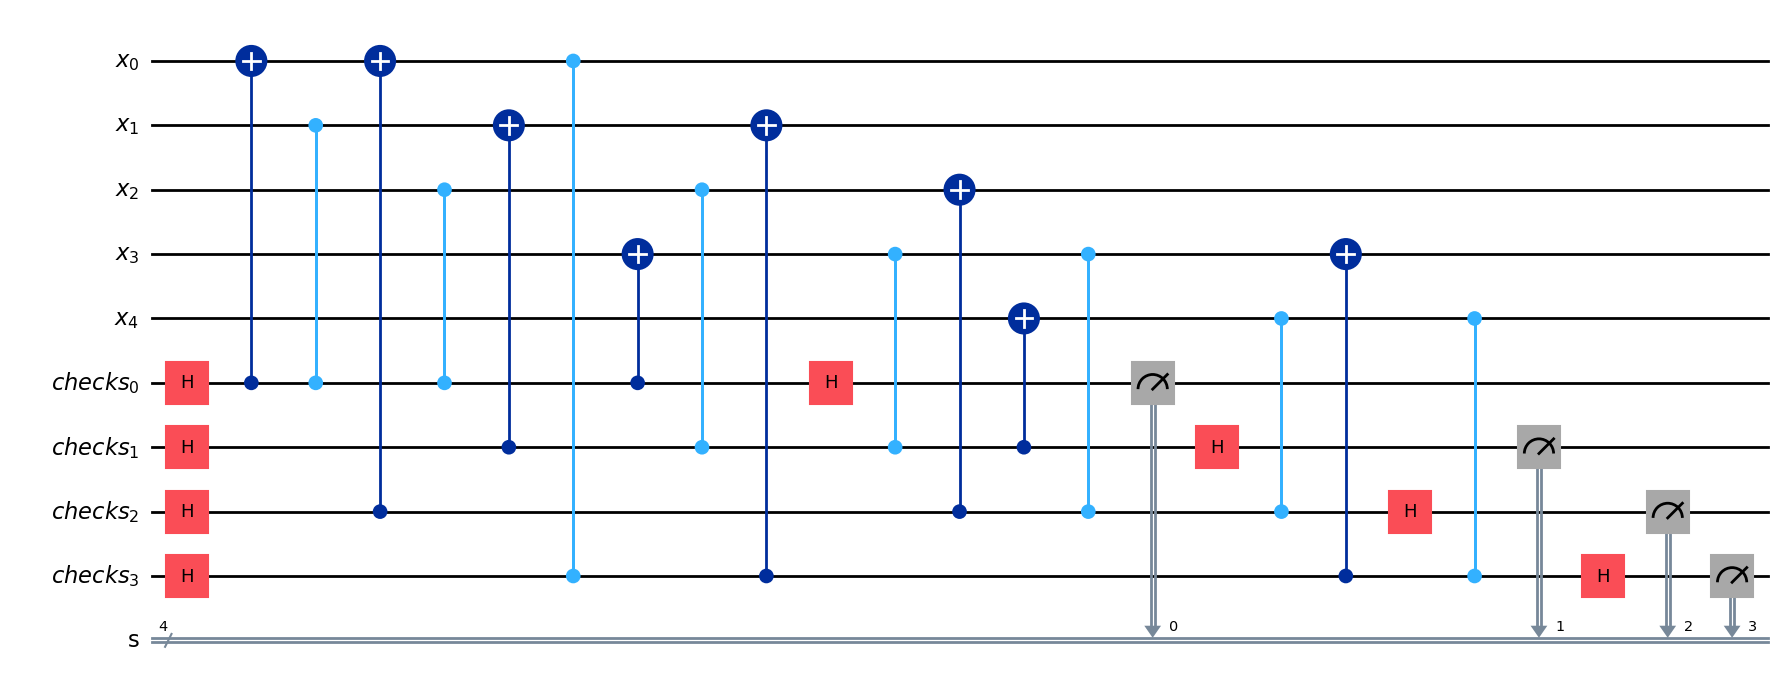

In [13]:
five_qubit_ecc.measure_syndromes().draw("mpl")

In [14]:
logical_state = QuantumRegister(5, name="x")

# Quantum register for checking generators of the stabilizer
checks = AncillaRegister(4, name="checks")

# Classical register for measuring syndromes
syndromes = ClassicalRegister(4, name="s")

test_qc = QuantumCircuit(logical_state, checks, syndromes, name="test")

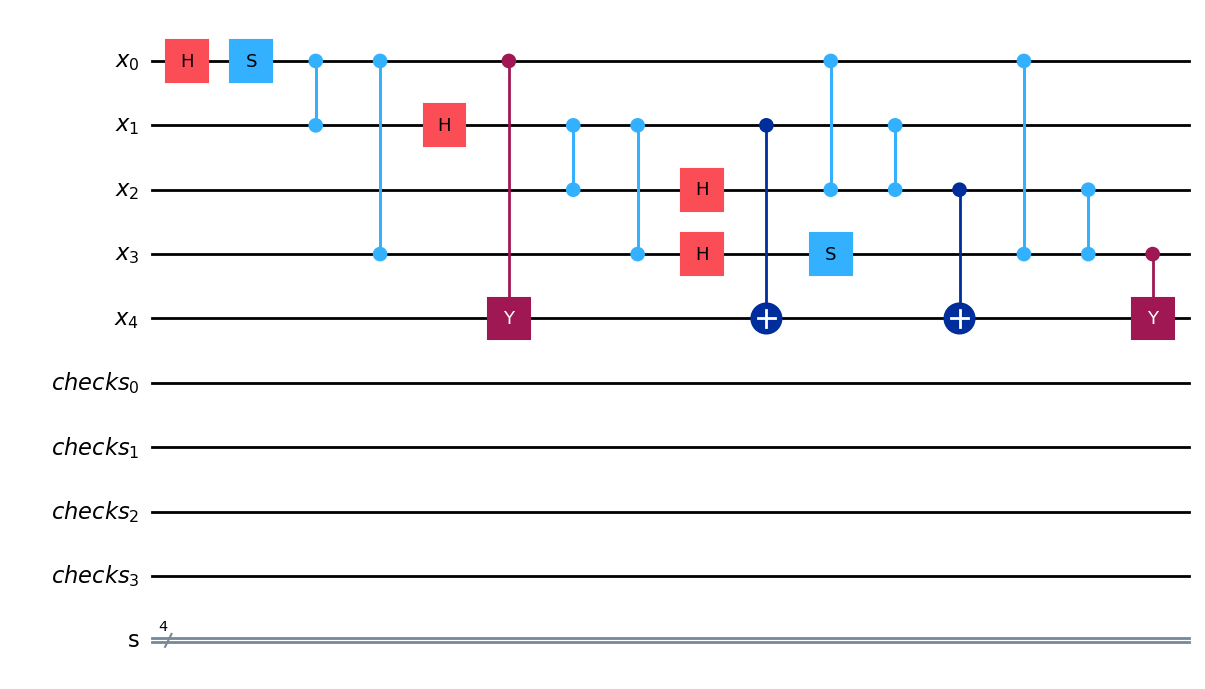

In [15]:
test_qc.compose(five_qubit_ecc.prepare_state(False), logical_state, inplace=True)
test_qc.draw("mpl")

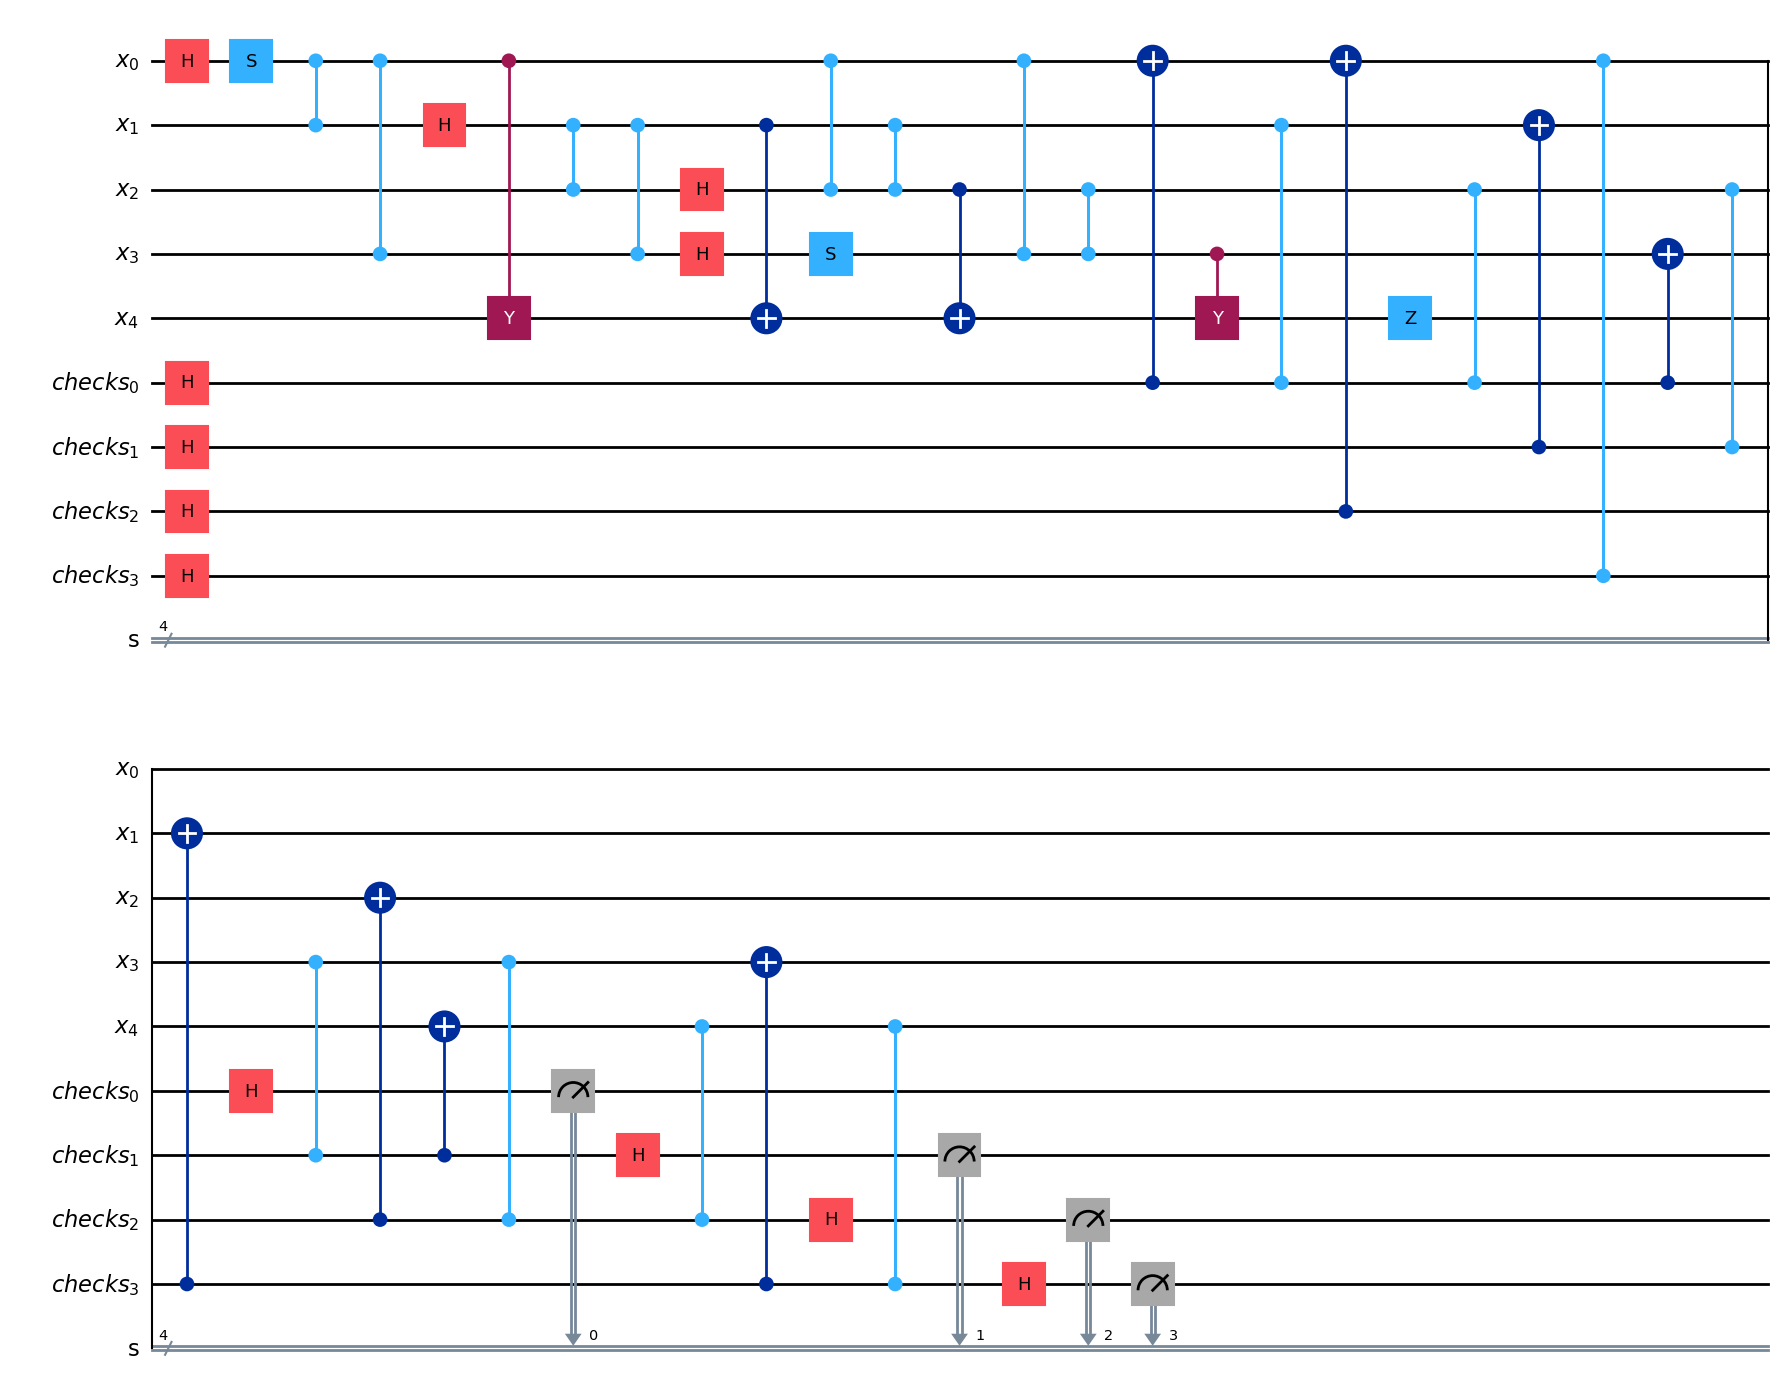

In [16]:
# Test an error and see what syndrome pops out
test_qc.z(4)

test_qc.compose(five_qubit_ecc.measure_syndromes(), qubits=[*logical_state, *checks], clbits=syndromes, inplace=True)

test_qc.draw("mpl")

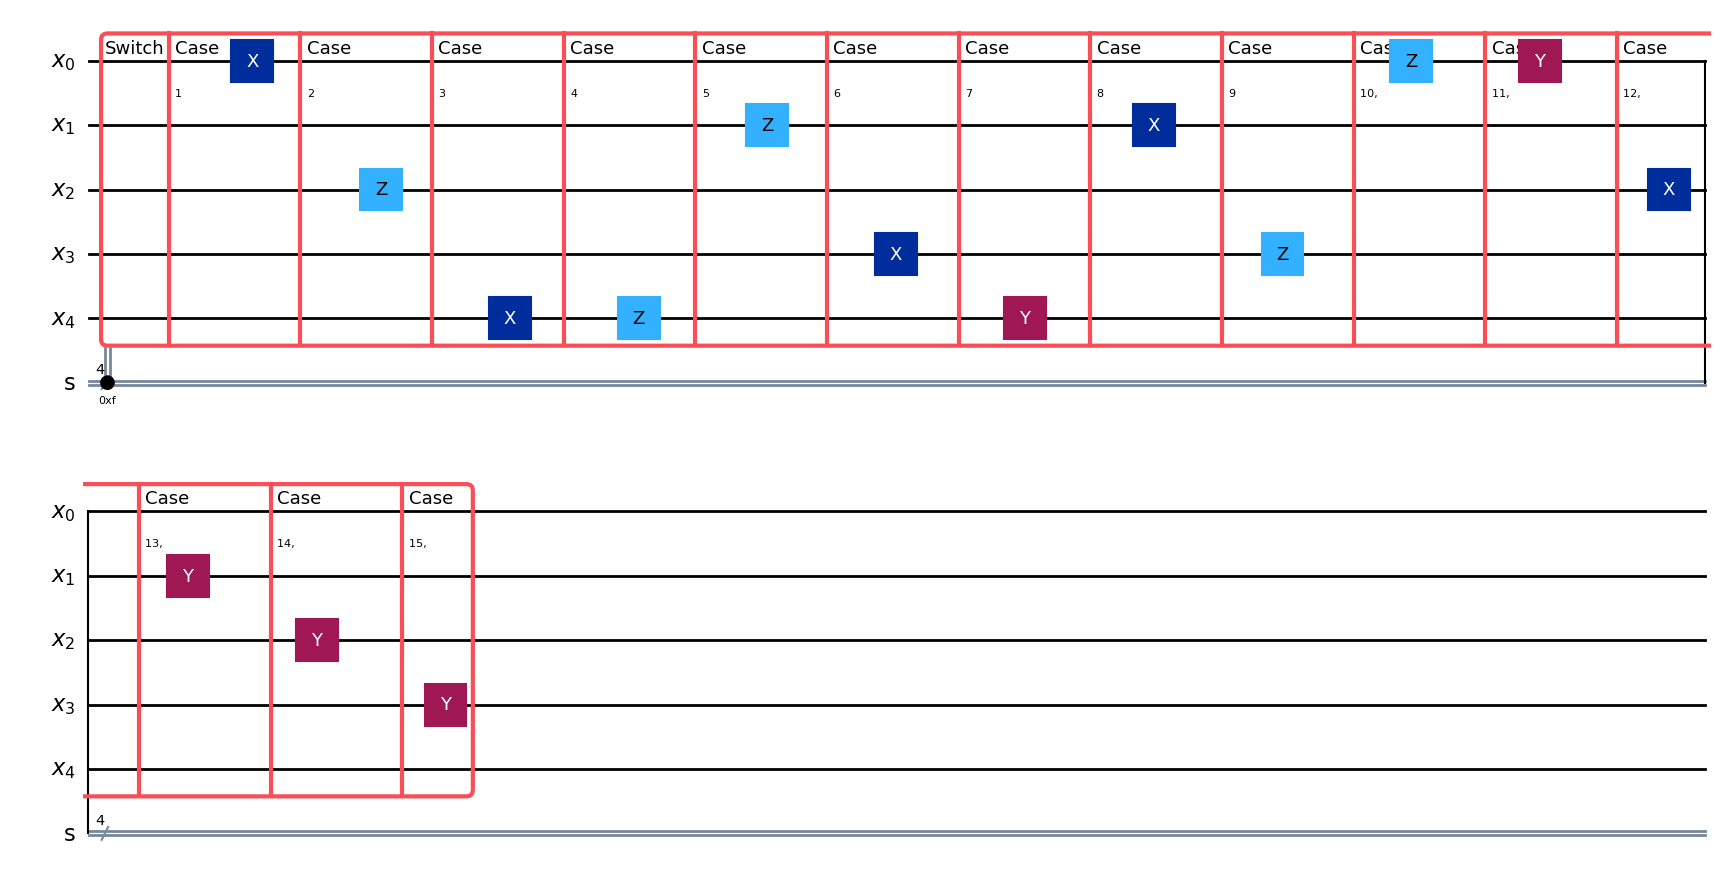

In [17]:
five_qubit_ecc.error_correction().draw("mpl")

In [18]:
simulator = AerSimulator()

In [19]:
# Transpile the circuit for the backend
compiled_circuit = transpile(test_qc, simulator)

# Run the circuit
job = simulator.run(compiled_circuit, shots=1000)

# Get the measurement counts
counts = job.result().get_counts()

In [20]:
counts

{'0010': 1000}

In [ ]:
num_simulations = 100
p = 0.05
x = False
counts = dict()
for i in range(num_simulations):
    compiled_circuit = transpile(five_qubit_ecc.main_circuit(x, p), simulator)
    job = simulator.run(compiled_circuit, shots=1)
    new_count = job.result().get_counts()
    for key in new_count:
        if key in counts:
            new_val = counts.get(key) + 1
            counts.update({key: new_val})
        else:
            counts.update({key: new_count.get(key)})
correct_count = 0
incorrect_count = 0
if x == False:
    correct_states = ("00000", "10010", "01001", "10100", "01010", "11011", "00110", "11000", "11101", "00011", "11110", "01111", "10001", "01100", "10111", "00101")
else:
    correct_states = ("11111", "01101", "10110", "01011", "10101", "00100", "11001", "00111", "00010", "11100", "00001", "10000", "01110", "10011", "01000", "11010")
for key in counts:
    if key[0:5] in correct_states:
        correct_count += counts.get(key)
    else:
        incorrect_count += counts.get(key)

print(correct_count, incorrect_count)

90 10


In [26]:
num_simulations = 100
p = 0.01
counts = dict()
for i in range(num_simulations):
    compiled_circuit = transpile(five_qubit_ecc.main_circuit(False, p), simulator)
    job = simulator.run(compiled_circuit, shots=1)
    new_count = job.result().get_counts()
    for key in new_count:
        if key in counts:
            new_val = counts.get(key) + 1
            counts.update({key: new_val})
        else:
            counts.update({key: new_count.get(key)})
correct_count = 0
incorrect_count = 0
correct_states = ("00000", "10010", "01001", "10100", "01010", "11011", "00110", "11000", "11101", "00011", "11110", "01111", "10001", "01100", "10111", "00101")
for key in counts:
    if key[0:5] in correct_states:
        correct_count += counts.get(key)
    else:
        incorrect_count += counts.get(key)

print(correct_count, incorrect_count)

99 1


In [28]:
num_simulations = 1000
p = 0.1
counts = dict()
for i in range(num_simulations):
    compiled_circuit = transpile(five_qubit_ecc.main_circuit(False, p), simulator)
    job = simulator.run(compiled_circuit, shots=1)
    new_count = job.result().get_counts()
    for key in new_count:
        if key in counts:
            new_val = counts.get(key) + 1
            counts.update({key: new_val})
        else:
            counts.update({key: new_count.get(key)})
correct_count = 0
incorrect_count = 0
correct_states = ("00000", "10010", "01001", "10100", "01010", "11011", "00110", "11000", "11101", "00011", "11110", "01111", "10001", "01100", "10111", "00101")
for key in counts:
    if key[0:5] in correct_states:
        correct_count += counts.get(key)
    else:
        incorrect_count += counts.get(key)

print(correct_count, incorrect_count)

743 257


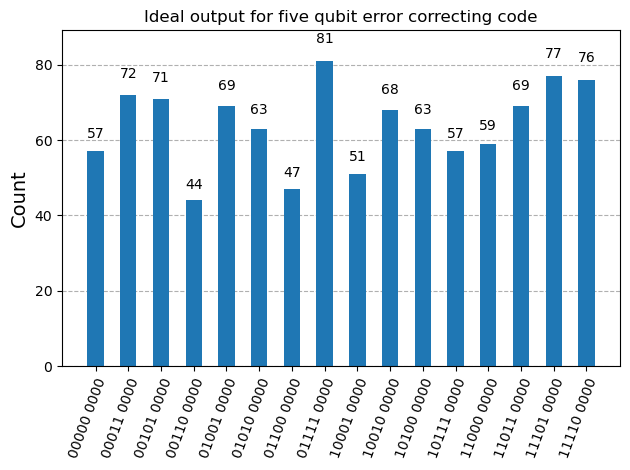

In [23]:
sim_ideal = AerSimulator()
five_qubit_ecc_circ = transpile(five_qubit_ecc.five_qubit_ecc(), sim_ideal)

ideal_result = sim_ideal.run(five_qubit_ecc_circ).result()
ideal_counts = ideal_result.get_counts(0)
plot_histogram(ideal_counts,
               title="Ideal output for five qubit error correcting code")

In [24]:
p = 0.05
sim_noise = AerSimulator(noise_model=five_qubit_ecc.random_pauli(p))

noise_result = sim_noise.run(five_qubit_ecc.five_qubit_ecc()).result()
noise_counts = noise_result.get_counts(five_qubit_ecc.five_qubit_ecc())
plot_histogram(noise_counts,
               title='Noisy output for five qubit error correcting code')

AerError: 'unknown instruction: state preparation'

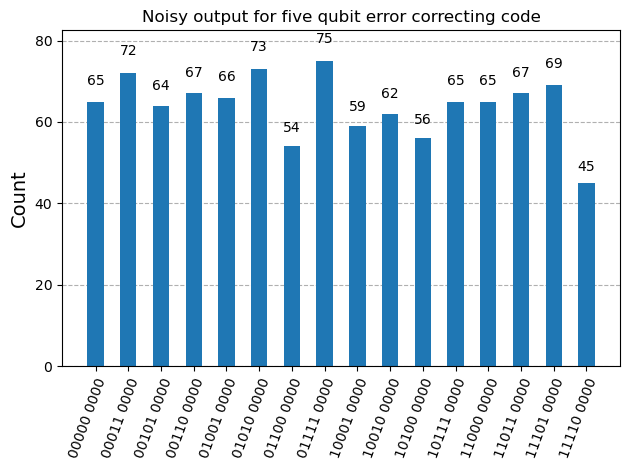

In [ ]:
p = 0.05
sim_noise = AerSimulator(noise_model=five_qubit_ecc.random_pauli(p))
five_qubit_ecc_circ_noise = transpile(five_qubit_ecc.five_qubit_ecc(), sim_noise, basis_gates=basis_gates)

noise_result = sim_noise.run(five_qubit_ecc_circ_noise).result()
noise_counts = noise_result.get_counts(five_qubit_ecc.five_qubit_ecc())
plot_histogram(noise_counts,
               title='Noisy output for five qubit error correcting code')

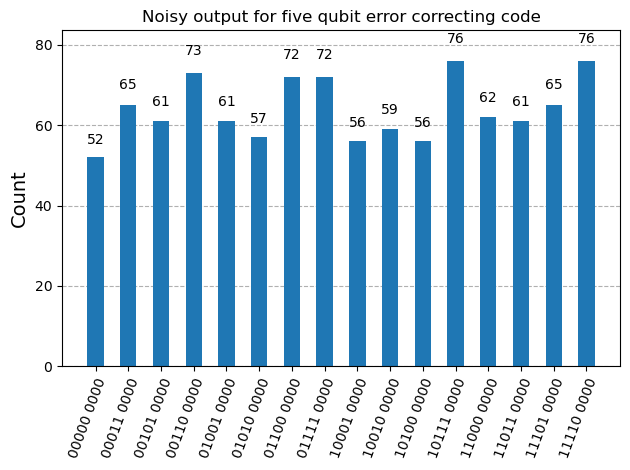

In [ ]:
p = 0.1
sim_noise = AerSimulator(noise_model=five_qubit_ecc.random_pauli(p))
five_qubit_ecc_circ_noise = transpile(five_qubit_ecc.five_qubit_ecc(), sim_noise, basis_gates=basis_gates)

noise_result = sim_noise.run(five_qubit_ecc_circ_noise).result()
noise_counts = noise_result.get_counts(five_qubit_ecc.five_qubit_ecc())
plot_histogram(noise_counts,
               title='Noisy output for five qubit error correcting code')

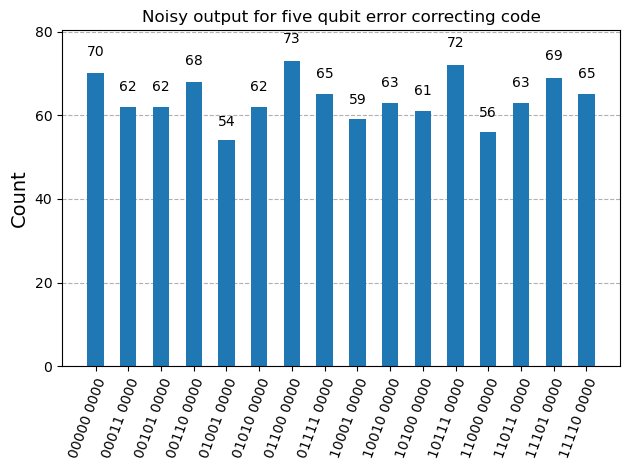

In [ ]:
p = 0.2
sim_noise = AerSimulator(noise_model=five_qubit_ecc.random_pauli(p))
five_qubit_ecc_circ_noise = transpile(five_qubit_ecc.five_qubit_ecc(), sim_noise, basis_gates=basis_gates)

noise_result = sim_noise.run(five_qubit_ecc_circ_noise).result()
noise_counts = noise_result.get_counts(five_qubit_ecc.five_qubit_ecc())
plot_histogram(noise_counts,
               title='Noisy output for five qubit error correcting code')

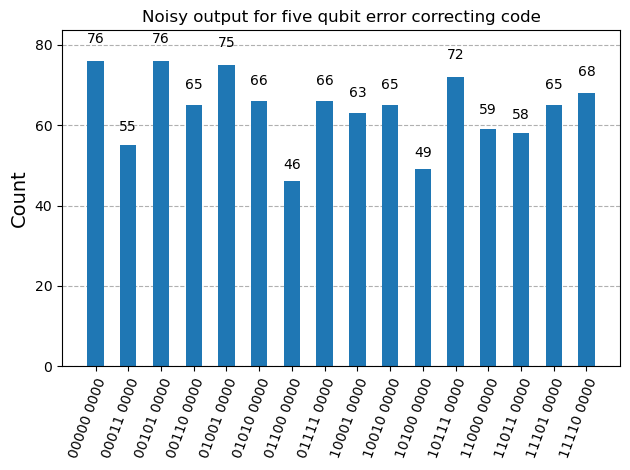

In [ ]:
p = 0.3
sim_noise = AerSimulator(noise_model=five_qubit_ecc.random_pauli(p))
five_qubit_ecc_circ_noise = transpile(five_qubit_ecc.five_qubit_ecc(), sim_noise, basis_gates=basis_gates)

noise_result = sim_noise.run(five_qubit_ecc_circ_noise).result()
noise_counts = noise_result.get_counts(five_qubit_ecc.five_qubit_ecc())
plot_histogram(noise_counts,
               title='Noisy output for five qubit error correcting code')

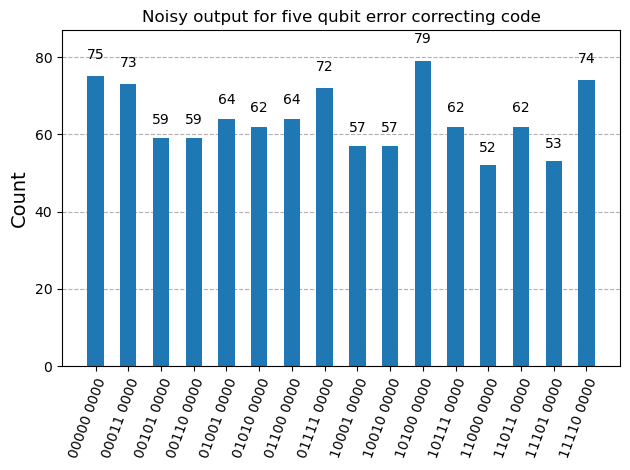

In [ ]:
p = 0.32
sim_noise = AerSimulator(noise_model=five_qubit_ecc.random_pauli(p))
five_qubit_ecc_circ_noise = transpile(five_qubit_ecc.five_qubit_ecc(), sim_noise, basis_gates=basis_gates)

noise_result = sim_noise.run(five_qubit_ecc_circ_noise).result()
noise_counts = noise_result.get_counts(five_qubit_ecc.five_qubit_ecc())
plot_histogram(noise_counts,
               title='Noisy output for five qubit error correcting code')

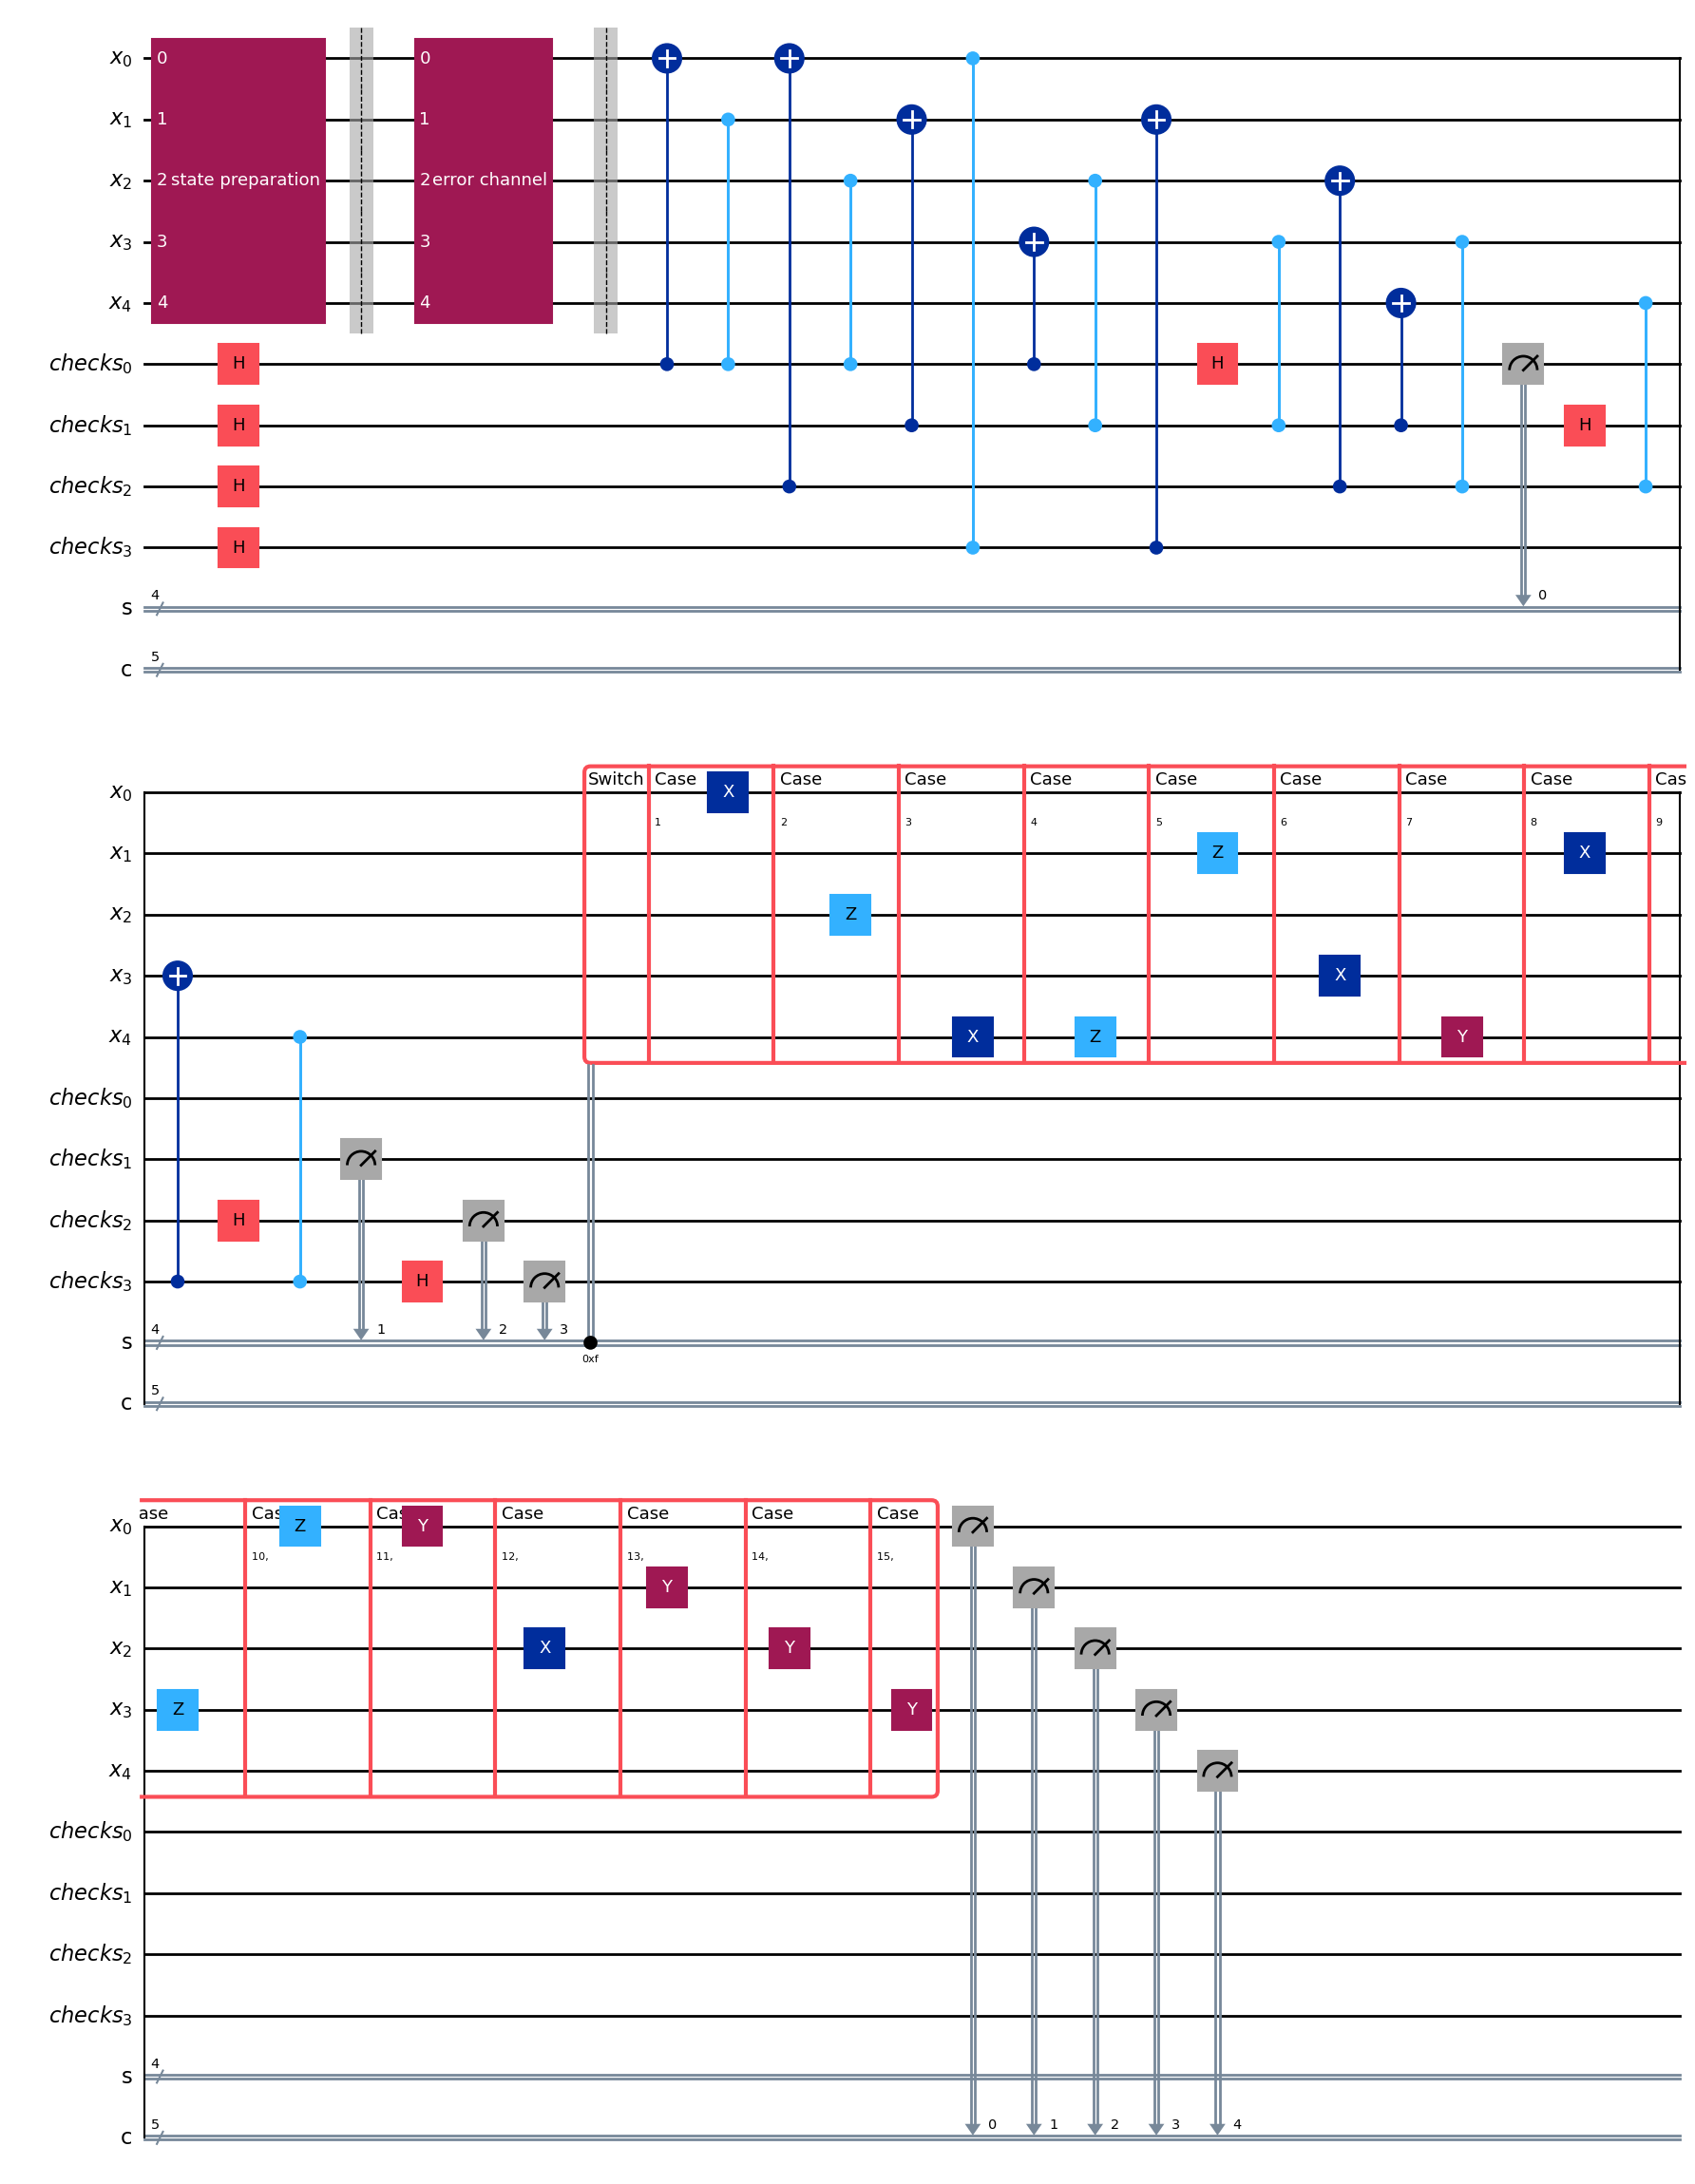

In [ ]:
five_qubit_ecc.five_qubit_ecc().draw("mpl")

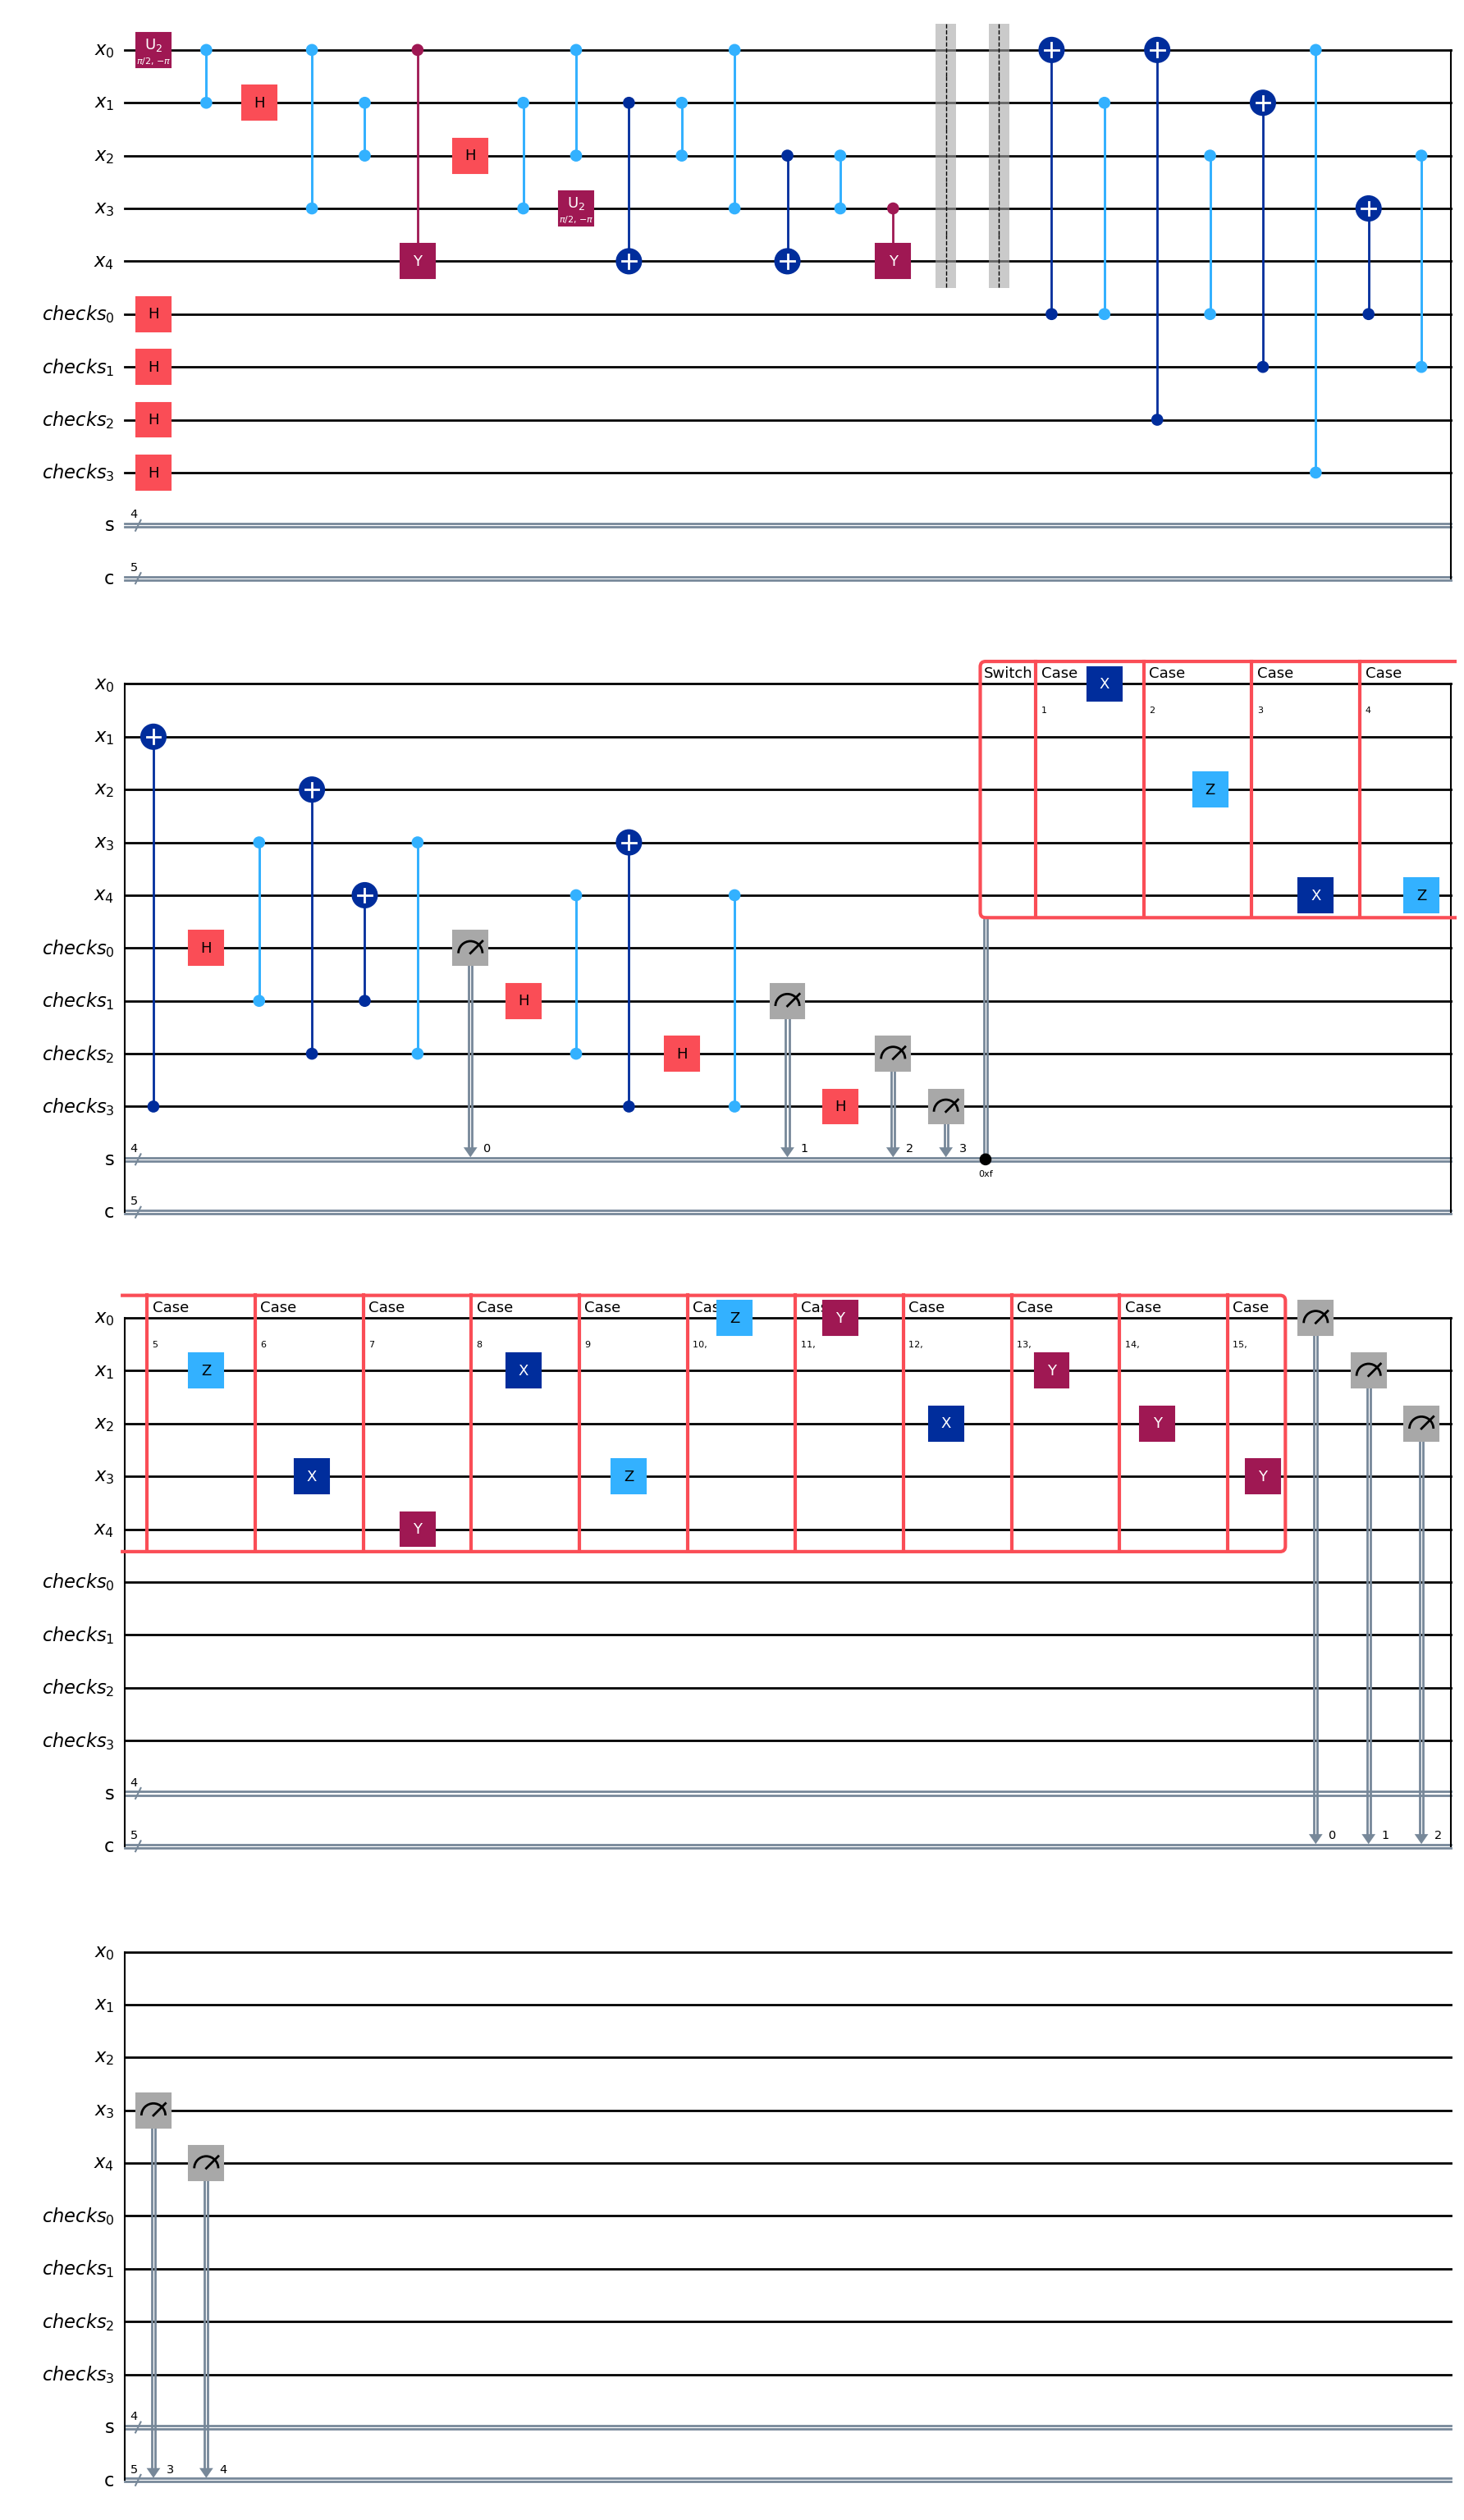

In [ ]:
five_qubit_ecc_circ.draw("mpl")

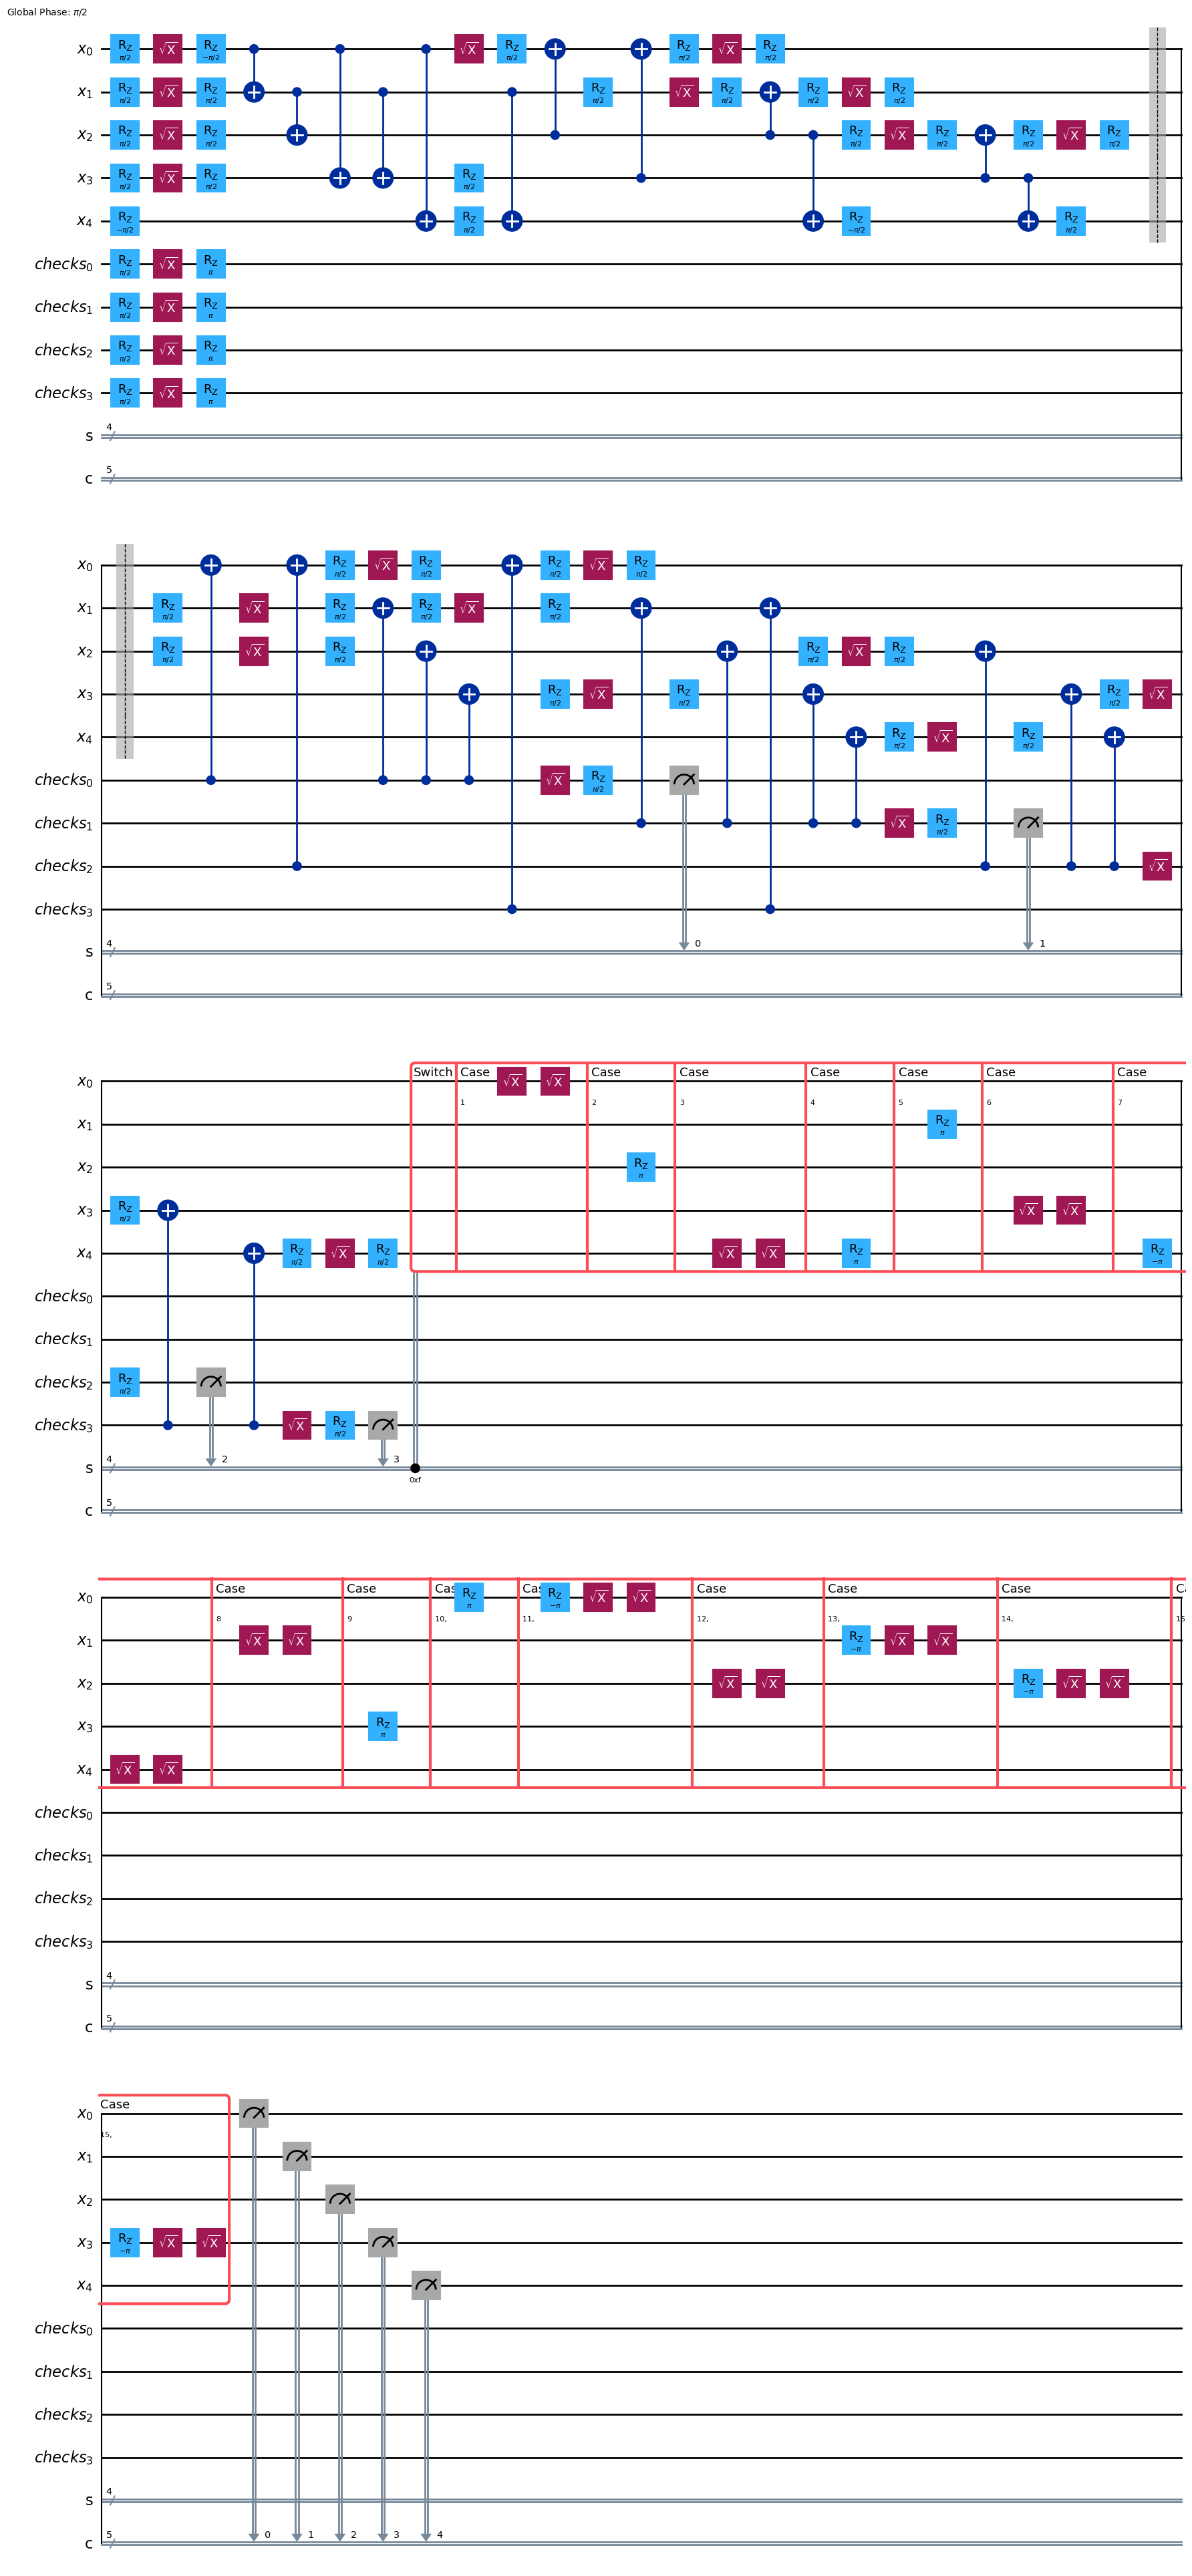

In [ ]:
five_qubit_ecc_circ_noise.draw("mpl")

In [ ]:
print(five_qubit_ecc.random_pauli(0.05))

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['error channel']
  All-qubits errors: ['error channel']
